LDA Accuracy = 97.0
QDA Accuracy = 96.0


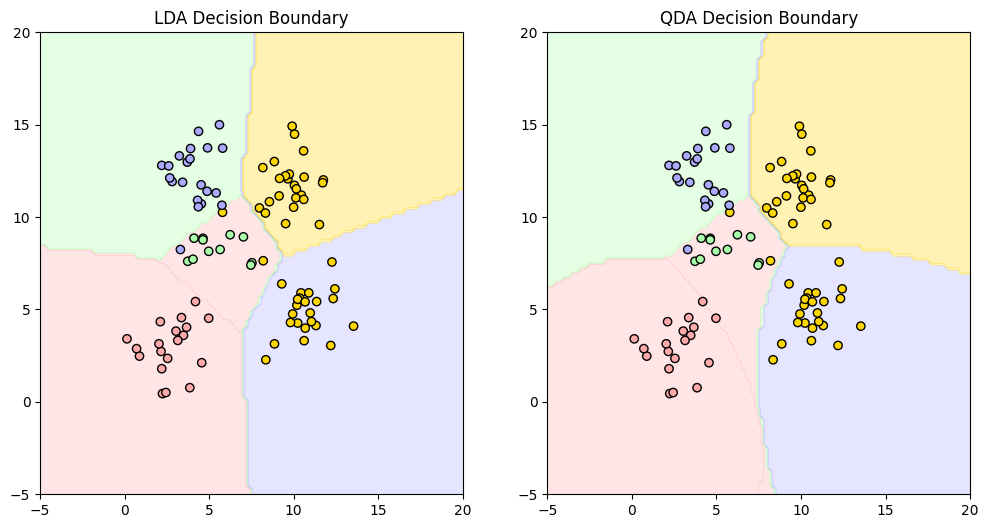


MSE without intercept for training: 19099.446844570717
MSE with intercept for training: 2187.1602949303874
MSE without intercept for testing: 106775.36156042796
MSE with intercept for testing: 3707.8401814263093

MSE VALUES OF TRAIN AND TEST DATA USING LAMBDA VALUES 0-1
Lambda: 0.00, Train MSE: 2187.1603, Test MSE: 3707.8402
Lambda: 0.01, Train MSE: 2306.8322, Test MSE: 2982.4461
Lambda: 0.02, Train MSE: 2354.0713, Test MSE: 2900.9736
Lambda: 0.03, Train MSE: 2386.7802, Test MSE: 2870.9416
Lambda: 0.04, Train MSE: 2412.1190, Test MSE: 2858.0004
Lambda: 0.05, Train MSE: 2433.1744, Test MSE: 2852.6657
Lambda: 0.06, Train MSE: 2451.5285, Test MSE: 2851.3302
Lambda: 0.07, Train MSE: 2468.0776, Test MSE: 2852.3500
Lambda: 0.08, Train MSE: 2483.3656, Test MSE: 2854.8797
Lambda: 0.09, Train MSE: 2497.7403, Test MSE: 2858.4444
Lambda: 0.10, Train MSE: 2511.4323, Test MSE: 2862.7579
Lambda: 0.11, Train MSE: 2524.6000, Test MSE: 2867.6379
Lambda: 0.12, Train MSE: 2537.3549, Test MSE: 2872.9623


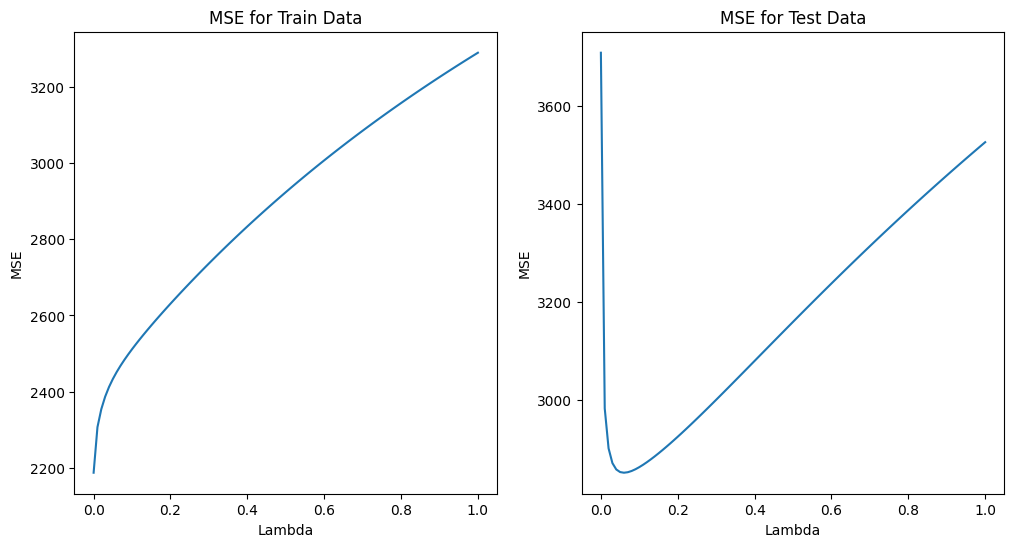

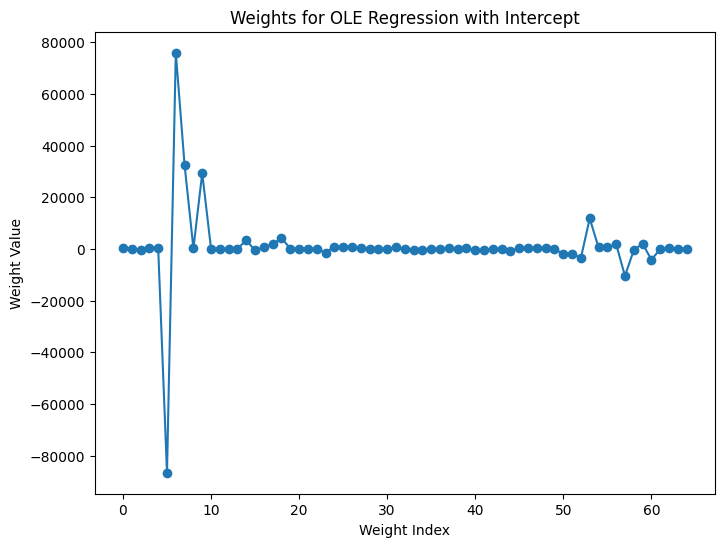


Optimal lambda based on test MSE in Problem 3: 0.06


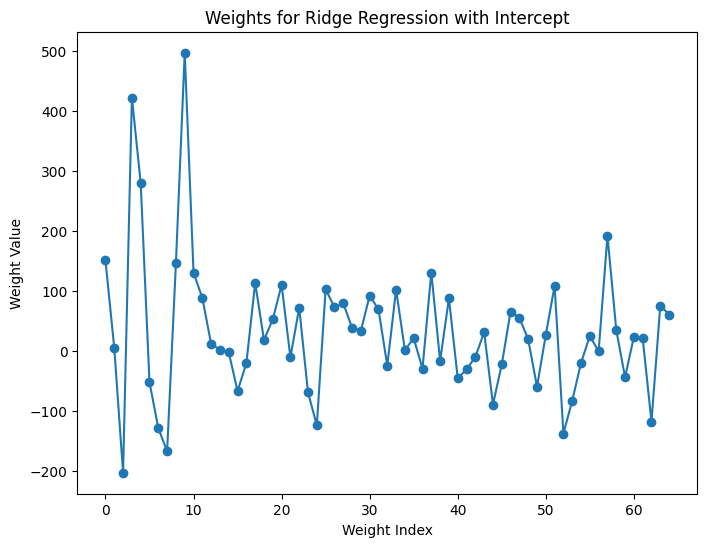


MSE VALUES OF TRAIN AND TEST DATA USING GRADIENT DESCENT APPROACH
Lambda: 0.00, Train MSE: 2255.8167, Test MSE: 3289.9174
Lambda: 0.01, Train MSE: 2307.5724, Test MSE: 2984.2334
Lambda: 0.02, Train MSE: 2352.9404, Test MSE: 2902.7946
Lambda: 0.03, Train MSE: 2386.8990, Test MSE: 2870.6680
Lambda: 0.04, Train MSE: 2412.0367, Test MSE: 2858.0748
Lambda: 0.05, Train MSE: 2433.1747, Test MSE: 2852.6685
Lambda: 0.06, Train MSE: 2451.5856, Test MSE: 2851.2903
Lambda: 0.07, Train MSE: 2468.0866, Test MSE: 2852.3519
Lambda: 0.08, Train MSE: 2483.3666, Test MSE: 2854.8822
Lambda: 0.09, Train MSE: 2497.7413, Test MSE: 2858.4358
Lambda: 0.10, Train MSE: 2511.4325, Test MSE: 2862.7585
Lambda: 0.11, Train MSE: 2524.6000, Test MSE: 2867.6381
Lambda: 0.12, Train MSE: 2537.3549, Test MSE: 2872.9623
Lambda: 0.13, Train MSE: 2549.7773, Test MSE: 2878.6459
Lambda: 0.14, Train MSE: 2561.9242, Test MSE: 2884.6281
Lambda: 0.15, Train MSE: 2573.8414, Test MSE: 2890.8592
Lambda: 0.16, Train MSE: 2585.5597, T

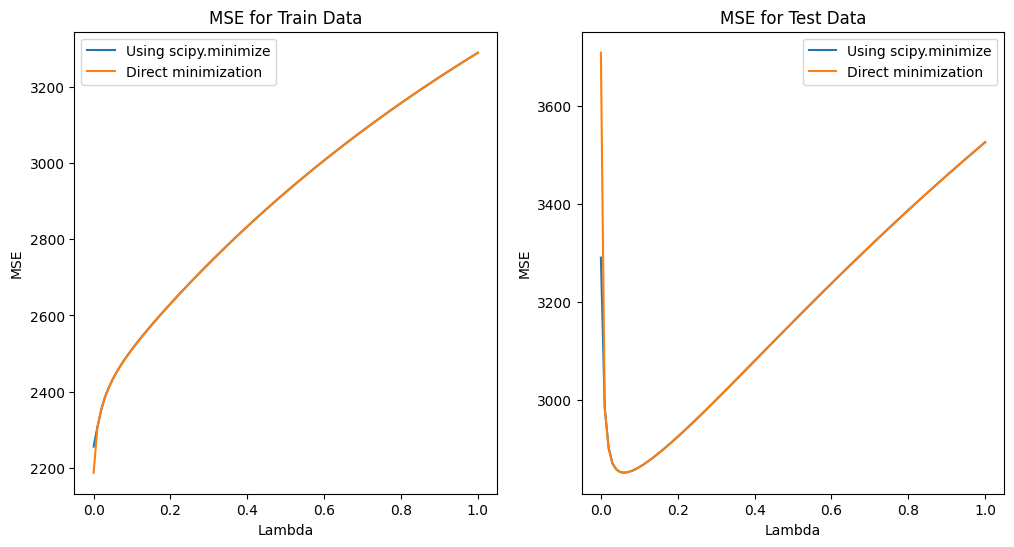


MSE VALUES FOR TRAIN AND TEST DATA USING DIFFERENT P VALUES (WITH AND WITHOUT REGULARIZATION)
P value: 0
Train MSE without regularization: 5650.7105
Train MSE with regularization (lambda=0.06): 5650.7119
Test MSE without regularization: 6286.4048
Test MSE with regularization (lambda=0.06): 6286.8820

P value: 1
Train MSE without regularization: 3930.9154
Train MSE with regularization (lambda=0.06): 3951.8391
Test MSE without regularization: 3845.0347
Test MSE with regularization (lambda=0.06): 3895.8565

P value: 2
Train MSE without regularization: 3911.8397
Train MSE with regularization (lambda=0.06): 3950.6873
Test MSE without regularization: 3907.1281
Test MSE with regularization (lambda=0.06): 3895.5841

P value: 3
Train MSE without regularization: 3911.1887
Train MSE with regularization (lambda=0.06): 3950.6825
Test MSE without regularization: 3887.9755
Test MSE with regularization (lambda=0.06): 3895.5827

P value: 4
Train MSE without regularization: 3885.4731
Train MSE with reg

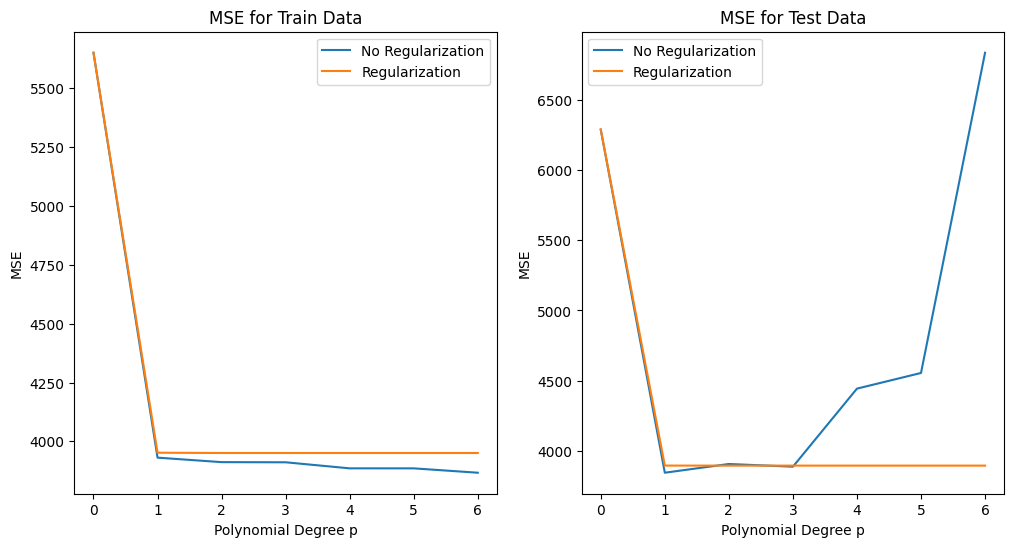

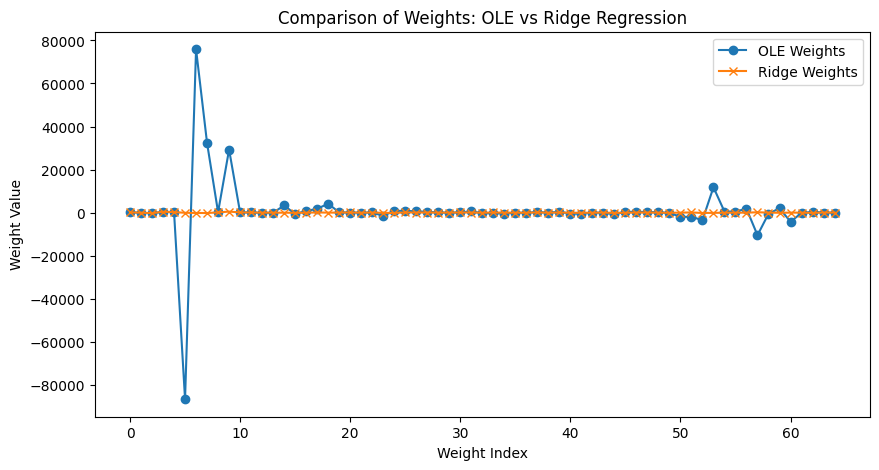

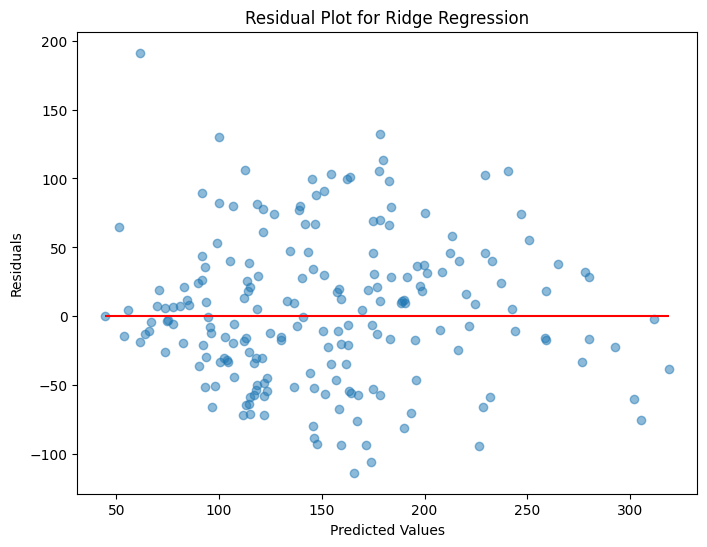

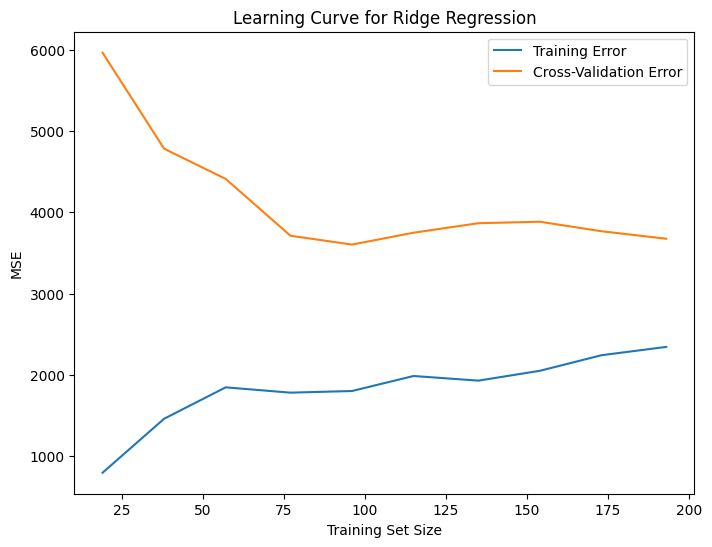

In [2]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys
from matplotlib.colors import ListedColormap

def ldaLearn(X, y):
    # Inputs:
    # X - N x d matrix with each row as a training example
    # y - N x 1 vector of labels
    # Outputs:
    # means - d x k matrix of class means
    # covmat - d x d shared covariance matrix

    # Get unique class labels
    class_labels = np.unique(y)
    k = len(class_labels)
    d = X.shape[1]

    # Initialize means matrix
    means = np.zeros((d, k))

    # Compute means for each class
    for idx, label in enumerate(class_labels):
        class_data = X[y.flatten() == label, :]
        means[:, idx] = np.mean(class_data, axis=0)

    # Compute shared covariance matrix
    covmat = np.cov(X, rowvar=False)

    return means, covmat

def qdaLearn(X, y):
    # Inputs:
    # X - N x d matrix with each row as a training example
    # y - N x 1 vector of labels
    # Outputs:
    # means - d x k matrix of class means
    # covmats - list of k d x d covariance matrices

    class_labels = np.unique(y)
    k = len(class_labels)
    d = X.shape[1]

    # Initialize means matrix and covariance list
    means = np.zeros((d, k))
    covmats = []

    # Compute means and covariance matrices for each class
    for idx, label in enumerate(class_labels):
        class_data = X[y.flatten() == label, :]
        means[:, idx] = np.mean(class_data, axis=0)
        covmats.append(np.cov(class_data, rowvar=False))

    return means, covmats

def ldaTest(means, covmat, Xtest, ytest):
    # Inputs:
    # means - d x k matrix of class means
    # covmat - d x d shared covariance matrix
    # Xtest - N x d matrix of test data
    # ytest - N x 1 vector of true labels
    # Outputs:
    # ypred - N x 1 vector of predicted labels
    # acc - accuracy percentage

    inv_covmat = np.linalg.inv(covmat)
    num_classes = means.shape[1]
    N = Xtest.shape[0]

    # Compute discriminant scores
    scores = np.zeros((N, num_classes))
    for idx in range(num_classes):
        diff = Xtest - means[:, idx].T
        scores[:, idx] = -0.5 * np.sum(diff @ inv_covmat * diff, axis=1)

    # Predict labels
    ypred = np.argmax(scores, axis=1) + 1  # +1 to match label indexing
    ytest = ytest.flatten()
    acc = 100 * np.mean(ypred == ytest)

    return ypred.reshape(-1,1), acc

def qdaTest(means, covmats, Xtest, ytest):
    # Inputs:
    # means - d x k matrix of class means
    # covmats - list of k d x d covariance matrices
    # Xtest - N x d matrix of test data
    # ytest - N x 1 vector of true labels
    # Outputs:
    # ypred - N x 1 vector of predicted labels
    # acc - accuracy percentage

    num_classes = means.shape[1]
    N = Xtest.shape[0]

    # Compute discriminant scores
    scores = np.zeros((N, num_classes))
    for idx in range(num_classes):
        diff = Xtest - means[:, idx].T
        inv_covmat = np.linalg.inv(covmats[idx])
        det_covmat = np.linalg.det(covmats[idx])
        term1 = -0.5 * np.sum(diff @ inv_covmat * diff, axis=1)
        term2 = -0.5 * np.log(det_covmat)
        scores[:, idx] = term1 + term2

    # Predict labels
    ypred = np.argmax(scores, axis=1) + 1  # +1 to match label indexing
    ytest = ytest.flatten()
    acc = 100 * np.mean(ypred == ytest)

    return ypred.reshape(-1,1), acc

def learnOLERegression(X, y):
    # Inputs:
    # X - N x d matrix of training data
    # y - N x 1 vector of targets
    # Outputs:
    # w - d x 1 vector of learned weights

    w = np.linalg.solve(X.T @ X, X.T @ y)
    return w

def learnRidgeRegression(X, y, lambd):
    # Inputs:
    # X - N x d matrix of training data
    # y - N x 1 vector of targets
    # lambd - regularization parameter
    # Outputs:
    # w - d x 1 vector of learned weights

    d = X.shape[1]
    I = np.identity(d)
    w = np.linalg.solve(X.T @ X + lambd * I, X.T @ y)
    return w

def testOLERegression(w, Xtest, ytest):
    # Inputs:
    # w - d x 1 vector of weights
    # Xtest - N x d matrix of test data
    # ytest - N x 1 vector of true targets
    # Outputs:
    # mse - mean squared error

    predictions = Xtest @ w
    mse = np.mean((ytest - predictions) ** 2)
    return mse

def regressionObjVal(w, X, y, lambd):
    # Compute objective function value and gradient for ridge regression
    # Inputs:
    # w - d x 1 vector of weights
    # X - N x d matrix of data
    # y - N x 1 vector of targets
    # lambd - regularization parameter
    # Outputs:
    # error - scalar value of the objective function
    # error_grad - d x 1 vector of gradients

    w = w.reshape(-1, 1)
    error = 0.5 * np.sum((y - X @ w) ** 2) + 0.5 * lambd * np.sum(w ** 2)
    error_grad = -X.T @ (y - X @ w) + lambd * w
    error_grad = error_grad.flatten()
    return error, error_grad

def mapNonLinear(x, p):
    # Inputs:
    # x - N x 1 vector
    # p - degree of polynomial
    # Outputs:
    # Xp - N x (p+1) matrix of mapped data

    N = x.shape[0]
    Xp = np.ones((N, p+1))
    for i in range(1, p+1):
        Xp[:, i] = x.flatten() ** i  # Ensure x is 1D for exponentiation
    return Xp

# Main script

# Problem 1
# Load the sample data
if sys.version_info.major == 2:
    X, y, Xtest, ytest = pickle.load(open('sample.pickle', 'rb'))
else:
    X, y, Xtest, ytest = pickle.load(open('sample.pickle', 'rb'), encoding='latin1')

# LDA
means, covmat = ldaLearn(X, y)
ldares, ldaacc = ldaTest(means, covmat, Xtest, ytest)
print('LDA Accuracy = ' + str(ldaacc))

# QDA
means, covmats = qdaLearn(X, y)
qdares, qdaacc = qdaTest(means, covmats, Xtest, ytest)
print('QDA Accuracy = ' + str(qdaacc))

# Plotting boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700'])

# Define grid for decision boundaries
x1 = np.linspace(-5, 20, 100)
x2 = np.linspace(-5, 20, 100)
xx1, xx2 = np.meshgrid(x1, x2)
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

fig = plt.figure(figsize=[12, 6])

# Plot LDA decision boundaries
plt.subplot(1, 2, 1)
zldares, _ = ldaTest(means, covmat, grid_points, np.zeros((grid_points.shape[0], 1)))
plt.contourf(x1, x2, zldares.reshape(xx1.shape), alpha=0.3, cmap=cmap_background)
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest.flatten(), edgecolor='k', cmap=cmap_background)
plt.title('LDA Decision Boundary')

# Plot QDA decision boundaries
plt.subplot(1, 2, 2)
zqdares, _ = qdaTest(means, covmats, grid_points, np.zeros((grid_points.shape[0], 1)))
plt.contourf(x1, x2, zqdares.reshape(xx1.shape), alpha=0.3, cmap=cmap_background)
plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest.flatten(), edgecolor='k', cmap=cmap_background)
plt.title('QDA Decision Boundary')

plt.show()

# Problem 2
if sys.version_info.major == 2:
    X, y, Xtest, ytest = pickle.load(open('diabetes.pickle', 'rb'))
else:
    X, y, Xtest, ytest = pickle.load(open('diabetes.pickle', 'rb'), encoding='latin1')

# Add intercept
X_i = np.hstack((np.ones((X.shape[0], 1)), X))
Xtest_i = np.hstack((np.ones((Xtest.shape[0], 1)), Xtest))

# Learn weights without intercept
w = learnOLERegression(X, y)
# Calculate MSE without intercept for training and testing
mse_train_without_intercept = testOLERegression(w, X, y)
mse_test_without_intercept = testOLERegression(w, Xtest, ytest)

# Learn weights with intercept
w_i = learnOLERegression(X_i, y)
# Calculate MSE with intercept for training and testing
mse_train_with_intercept = testOLERegression(w_i, X_i, y)
mse_test_with_intercept = testOLERegression(w_i, Xtest_i, ytest)

# Print results
print('\nMSE without intercept for training:', mse_train_without_intercept)
print('MSE with intercept for training:', mse_train_with_intercept)
print('MSE without intercept for testing:', mse_test_without_intercept)
print('MSE with intercept for testing:', mse_test_with_intercept)

# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
mses3_train = np.zeros((k, 1))
mses3 = np.zeros((k, 1))

print('\nMSE VALUES OF TRAIN AND TEST DATA USING LAMBDA VALUES 0-1')
for i, lambd in enumerate(lambdas):
    w_l = learnRidgeRegression(X_i, y, lambd)
    mses3_train[i] = testOLERegression(w_l, X_i, y)
    mses3[i] = testOLERegression(w_l, Xtest_i, ytest)
    print(f"Lambda: {lambd:.2f}, Train MSE: {mses3_train[i][0]:.4f}, Test MSE: {mses3[i][0]:.4f}")

fig = plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.plot(lambdas, mses3_train)
plt.title('MSE for Train Data')
plt.xlabel('Lambda')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(lambdas, mses3)
plt.title('MSE for Test Data')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(w_i, marker='o')
plt.title('Weights for OLE Regression with Intercept')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.show()

# Select the optimal lambda value from Problem 3
lambda_opt = lambdas[np.argmin(mses3)]
print(f"\nOptimal lambda based on test MSE in Problem 3: {lambda_opt}")

# Compute Ridge Regression weights using the selected lambda
w_ridge = learnRidgeRegression(X_i, y, lambda_opt)

# Plot Ridge Regression Weights
plt.figure(figsize=(8, 6))
plt.plot(w_ridge, marker='o')
plt.title('Weights for Ridge Regression with Intercept')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.show()

# Problem 4
mses4_train = np.zeros((k, 1))
mses4 = np.zeros((k, 1))
opts = {'maxiter': 100}
w_init = np.zeros(X_i.shape[1])  # Corrected to 1D array

print("\nMSE VALUES OF TRAIN AND TEST DATA USING GRADIENT DESCENT APPROACH")
for i, lambd in enumerate(lambdas):
    args = (X_i, y, lambd)
    res = minimize(regressionObjVal, w_init, jac=True, args=args, method='CG', options=opts)
    w_l = res.x.reshape(-1, 1)
    mses4_train[i] = testOLERegression(w_l, X_i, y)
    mses4[i] = testOLERegression(w_l, Xtest_i, ytest)
    print(f"Lambda: {lambd:.2f}, Train MSE: {mses4_train[i][0]:.4f}, Test MSE: {mses4[i][0]:.4f}")

fig = plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.plot(lambdas, mses4_train, label='Using scipy.minimize')
plt.plot(lambdas, mses3_train, label='Direct minimization')
plt.title('MSE for Train Data')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lambdas, mses4, label='Using scipy.minimize')
plt.plot(lambdas, mses3, label='Direct minimization')
plt.title('MSE for Test Data')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Problem 5
pmax = 7
mses5_train = np.zeros((pmax, 2))
mses5 = np.zeros((pmax, 2))

print("\nMSE VALUES FOR TRAIN AND TEST DATA USING DIFFERENT P VALUES (WITH AND WITHOUT REGULARIZATION)")
for p in range(pmax):
    Xd = mapNonLinear(X[:, 2:3], p)
    Xdtest = mapNonLinear(Xtest[:, 2:3], p)

    # Without regularization
    w_d1 = learnRidgeRegression(Xd, y, 0)
    mses5_train[p, 0] = testOLERegression(w_d1, Xd, y)
    mses5[p, 0] = testOLERegression(w_d1, Xdtest, ytest)

    # With regularization
    w_d2 = learnRidgeRegression(Xd, y, lambda_opt)
    mses5_train[p, 1] = testOLERegression(w_d2, Xd, y)
    mses5[p, 1] = testOLERegression(w_d2, Xdtest, ytest)

    print(f"P value: {p}")
    print(f"Train MSE without regularization: {mses5_train[p, 0]:.4f}")
    print(f"Train MSE with regularization (lambda={lambda_opt}): {mses5_train[p, 1]:.4f}")
    print(f"Test MSE without regularization: {mses5[p, 0]:.4f}")
    print(f"Test MSE with regularization (lambda={lambda_opt}): {mses5[p, 1]:.4f}\n")

# Determine the optimal p values based on the lowest test MSE
optimal_p_without_reg = np.argmin(mses5[:, 0])
optimal_p_with_reg = np.argmin(mses5[:, 1])

# Print the optimal p values
print("Optimal p values based on the lowest Test MSE:")
print(f"Optimal p without regularization: {optimal_p_without_reg}")
print(f"Optimal p with regularization (lambda={lambda_opt}): {optimal_p_with_reg}")

# Plotting MSE for Train and Test Data
fig = plt.figure(figsize=[12, 6])
plt.subplot(1, 2, 1)
plt.plot(range(pmax), mses5_train[:, 0], label='No Regularization')
plt.plot(range(pmax), mses5_train[:, 1], label='Regularization')
plt.title('MSE for Train Data')
plt.xlabel('Polynomial Degree p')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(pmax), mses5[:, 0], label='No Regularization')
plt.plot(range(pmax), mses5[:, 1], label='Regularization')
plt.title('MSE for Test Data')
plt.xlabel('Polynomial Degree p')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Additional Insights and Graphs

# 1. Comparison of OLE and Ridge Regression Weights
plt.figure(figsize=(10, 5))
plt.plot(w_i, marker='o', label='OLE Weights')
plt.plot(w_ridge, marker='x', label='Ridge Weights')
plt.title('Comparison of Weights: OLE vs Ridge Regression')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.legend()
plt.show()

# 2. Residual Plot for Ridge Regression
predictions = Xtest_i @ w_ridge
residuals = ytest - predictions

plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), colors='r')
plt.title('Residual Plot for Ridge Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Learning Curve for Ridge Regression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge

train_sizes, train_scores, test_scores = learning_curve(
    Ridge(alpha=lambda_opt), X_i, y.flatten(), cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, label='Training Error')
plt.plot(train_sizes, test_errors, label='Cross-Validation Error')
plt.title('Learning Curve for Ridge Regression')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()
